
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [2]:
# please fill in your student number and name
student_number = '400100616'
Name = 'Setayesh'
Last_Name = 'Esteki'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [4]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.learning_rate = learning_rate
        self.n_steps = n_steps
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        Prevent overflow by clamping the input values of z.
        """
        z = np.clip(z, -500, 500)  # Clamp values to prevent overflow
        return 1 / (1 + np.exp(-z))


    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        n = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        return loss

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / X.shape[0]
        return gradient

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        n_features = X_train.shape[1]
        self.weights = np.zeros(n_features)
        self.validation_accuracies = []
        

        for step in range(1, self.n_steps + 1):
            gradient = self.compute_gradient(X_train, y_train)
            self.weights -= self.learning_rate * gradient

            loss = self.compute_loss(X_train, y_train)
            self.loss_history.append(loss)

            if step % 100 == 0 or step == self.n_steps:
                val_accuracy = self.test_accuracy(X_val, y_val)
                self.validation_accuracies.append(val_accuracy)
                print(f"Step {step}: Loss = {loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")


            if step > 1 and abs(self.loss_history[-2] - self.loss_history[-1]) < self.tolerance:
                # Increase the tolerance for early stopping
                if abs(self.loss_history[-2] - self.loss_history[-1]) < 1e-8:  # Lower the threshold
                    print(f"Converged at step {step}.")
                    break


    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        """
        Plot the confusion matrix for the validation data using seaborn.
        """
        y_pred = self.predict(X_val)
        cm = confusion_matrix(y_val, y_pred, labels=labels)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Step 100: Loss = 0.0956, Validation Accuracy = 0.9500
Step 200: Loss = 0.0769, Validation Accuracy = 0.9500
Step 300: Loss = 0.0698, Validation Accuracy = 0.9500
Step 400: Loss = 0.0660, Validation Accuracy = 0.9500
Step 500: Loss = 0.0637, Validation Accuracy = 0.9500
Step 600: Loss = 0.0621, Validation Accuracy = 0.9500
Step 700: Loss = 0.0609, Validation Accuracy = 0.9500
Step 800: Loss = 0.0600, Validation Accuracy = 0.9500
Step 900: Loss = 0.0594, Validation Accuracy = 0.9500
Step 1000: Loss = 0.0588, Validation Accuracy = 0.9500
Test Accuracy: 97.50%


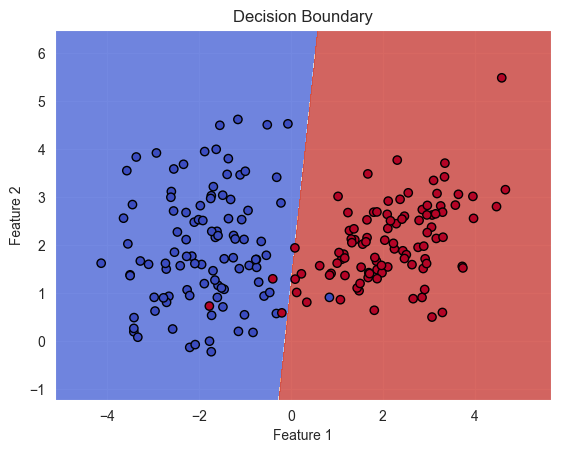

In [5]:
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    class_sep=2, 
    random_state=42
)


# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add a bias term (intercept) to the feature matrix
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Train and evaluate the model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

# Test accuracy
accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
grid = np.hstack([np.ones((grid.shape[0], 1)), grid])  # Add bias term
probs = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA


# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Inspect features and target
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Dataset shape:", X.shape)
print("Target distribution:", np.bincount(y))

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Dataset shape: (569, 30)
Target distribution: [212 357]


As you are familiar with, adding bias term 1 is necessary as well:

In [7]:
#TODO: scale data, add bias term

#TODO: split dataset into test and train

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept) to the feature matrix
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train and evaluate the model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

# Test accuracy
accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Step 100: Loss = 0.1139, Validation Accuracy = 0.9825
Step 200: Loss = 0.0954, Validation Accuracy = 0.9912
Step 300: Loss = 0.0869, Validation Accuracy = 0.9912
Step 400: Loss = 0.0817, Validation Accuracy = 0.9912
Step 500: Loss = 0.0781, Validation Accuracy = 0.9912
Step 600: Loss = 0.0753, Validation Accuracy = 0.9912
Step 700: Loss = 0.0731, Validation Accuracy = 0.9912
Step 800: Loss = 0.0712, Validation Accuracy = 0.9912
Step 900: Loss = 0.0697, Validation Accuracy = 0.9912
Step 1000: Loss = 0.0683, Validation Accuracy = 0.9912
Test Accuracy: 98.25%


Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

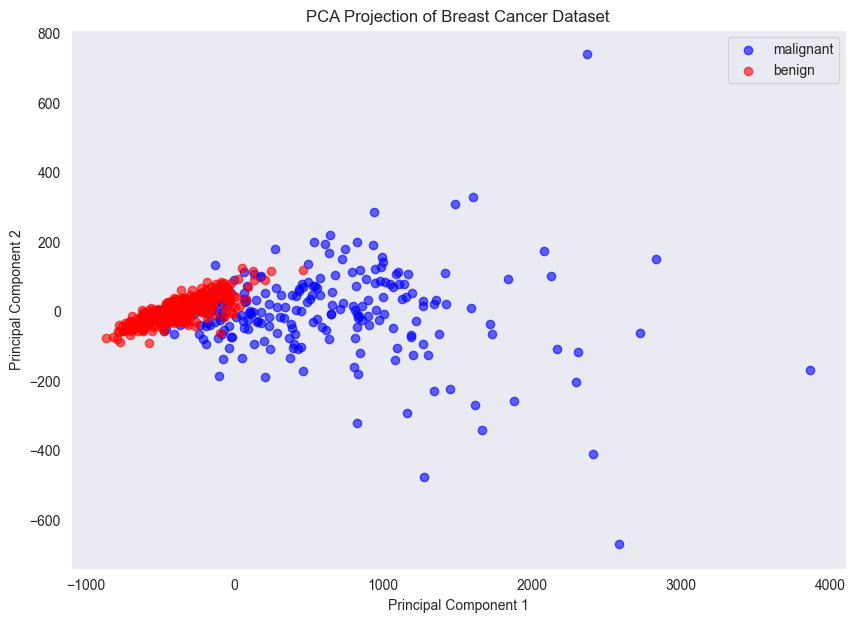

In [8]:
#TODO: reduce data into first two PCs and visualize the data
# Apply PCA to reduce data to first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:, 1:])  # Remove the bias term for PCA

# Visualize the data in PCA-reduced space
plt.figure(figsize=(10, 7))
colors = ['blue', 'red']
for label, color in zip(np.unique(y), colors):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], c=color, label=data.target_names[label], alpha=0.6)

plt.title("PCA Projection of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [9]:
#TODO: Train model and print out validation accuracy
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept) to the feature matrix
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train and evaluate the model
model = LogisticRegressionGD(learning_rate=0.1, n_steps=1000, tolerance=1e-6)
model.fit(X_train, y_train, X_val, y_val)

# Final Validation Accuracy
final_val_accuracy = model.test_accuracy(X_val, y_val)
print(f"Validation Accuracy: {final_val_accuracy:.4f}")



Step 100: Loss = 0.1139, Validation Accuracy = 0.9825
Step 200: Loss = 0.0954, Validation Accuracy = 0.9912
Step 300: Loss = 0.0869, Validation Accuracy = 0.9912
Step 400: Loss = 0.0817, Validation Accuracy = 0.9912
Step 500: Loss = 0.0781, Validation Accuracy = 0.9912
Step 600: Loss = 0.0753, Validation Accuracy = 0.9912
Step 700: Loss = 0.0731, Validation Accuracy = 0.9912
Step 800: Loss = 0.0712, Validation Accuracy = 0.9912
Step 900: Loss = 0.0697, Validation Accuracy = 0.9912
Step 1000: Loss = 0.0683, Validation Accuracy = 0.9912
Validation Accuracy: 0.9912


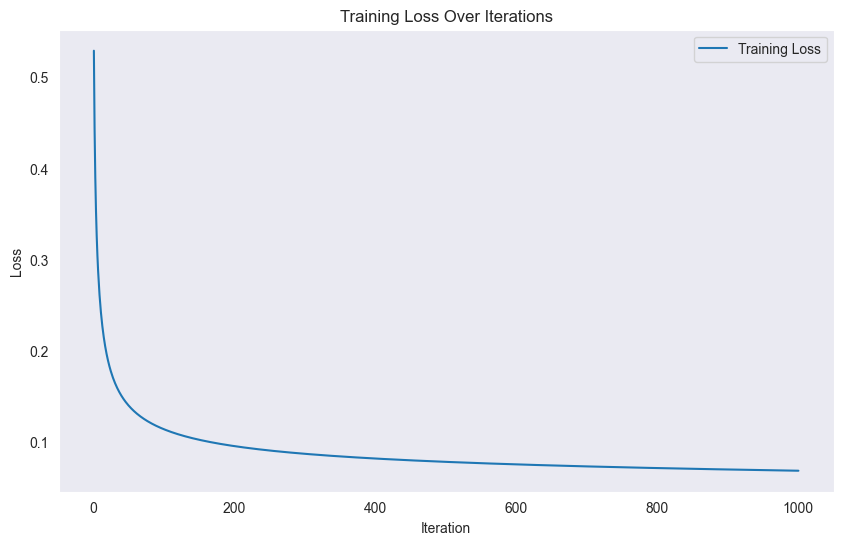

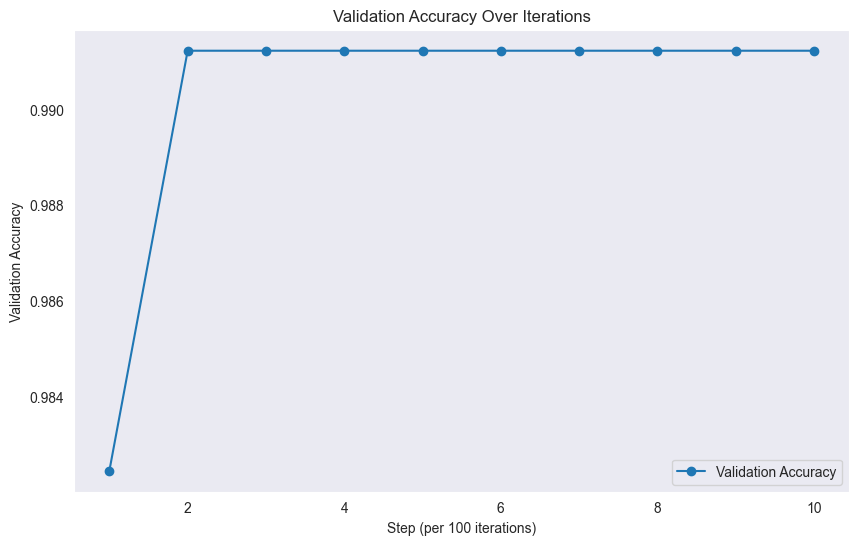

Validation Accuracy: 0.9912


In [10]:
#TODO: plot training logss

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.loss_history) + 1), model.loss_history, label='Training Loss')
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#TODO: plot validation accuracy over iterations

# Plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.validation_accuracies) + 1), model.validation_accuracies, label='Validation Accuracy', marker='o')
plt.title("Validation Accuracy Over Iterations")
plt.xlabel("Step (per 100 iterations)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# Final Validation Accuracy
final_val_accuracy = model.test_accuracy(X_val, y_val)
print(f"Validation Accuracy: {final_val_accuracy:.4f}")


**Why does the validation accuracy show a slight decrease?**

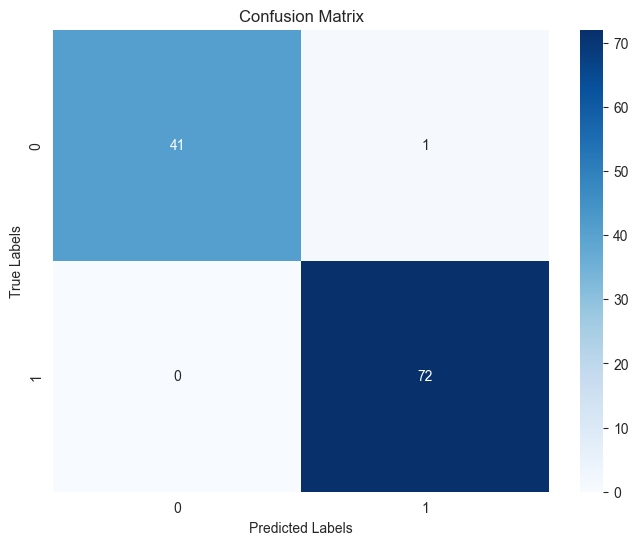

In [11]:
#TODO: plot confusion matrix
# Plot confusion matrix for validation data
model.plot_confusion_matrix(X_val, y_val, labels=[0, 1])


### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [12]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

mv: rename kaggle.json to /Users/setayesh/.kaggle/kaggle.json: No such file or directory
chmod: /Users/setayesh/.kaggle/kaggle.json: No such file or directory
zsh:1: command not found: kaggle
unzip:  cannot find or open rotten-tomatoes-movies-and-critic-reviews-dataset.zip, rotten-tomatoes-movies-and-critic-reviews-dataset.zip.zip or rotten-tomatoes-movies-and-critic-reviews-dataset.zip.ZIP.


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [13]:
!pip install nltk

#### Libraries

In [14]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/setayesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/setayesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/setayesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/setayesh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [15]:
#TODO: import data and filter out required rows
# Load Rotten Tomatoes datasets
critic_reviews_path = "/Users/setayesh/Documents/Edu/term7/AI/HW/AI HW4/Practical/Q2/rotten_tomatoes_critic_reviews.csv"  # Path to critic reviews file
movies_path = "/Users/setayesh/Documents/Edu/term7/AI/HW/AI HW4/Practical/Q2/rotten_tomatoes_movies.csv"  # Path to movies file

# Load datasets
critic_reviews_df = pd.read_csv(critic_reviews_path)
movies_df = pd.read_csv(movies_path)

# Filter out rows with NaN review scores and select top critics
filtered_reviews = critic_reviews_df[(~critic_reviews_df['review_score'].isna()) & (critic_reviews_df['top_critic'] == True)]

# Merge with movies dataset to get additional movie information if needed
merged_df = pd.merge(filtered_reviews, movies_df, on='rotten_tomatoes_link', how='inner')

# Display first few rows of the result
print(merged_df[['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content']].head())



  rotten_tomatoes_link       critic_name  top_critic       publisher_name  \
0            m/0814255  Bill Goodykoontz        True     Arizona Republic   
1            m/0814255      Jim Schembri        True  The Age (Australia)   
2            m/0814255       Roger Moore        True     Orlando Sentinel   
3            m/0814255     David Jenkins        True             Time Out   
4            m/0814255    Stephen Holden        True       New York Times   

  review_type review_score review_date  \
0       Fresh        3.5/5  2010-02-10   
1       Fresh          3/5  2010-02-10   
2      Rotten          2/4  2010-02-10   
3      Rotten          2/5  2010-02-10   
4      Rotten          2/5  2010-02-11   

                                      review_content  
0  Percy Jackson isn't a great movie, but it's a ...  
1  Crammed with dragons, set-destroying fights an...  
2  For what it is and for whom it is intended, it...  
3  Chris Columbus returns to his comfort zone for...  
4  Althou

To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [16]:
runtime_env = 'CPU' # or CPU

In [17]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


  
def preprocess_text(text):
    """
    Preprocess text by converting to lowercase, removing non-English characters,
    removing stopwords, and applying lemmatization.
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing on the review content
merged_df['processed_content'] = merged_df['review_content'].astype(str).apply(preprocess_text)

# Display the processed content alongside the original
print(merged_df[['review_type', 'review_content', 'processed_content']].head())


  review_type                                     review_content  \
0       Fresh  Percy Jackson isn't a great movie, but it's a ...   
1       Fresh  Crammed with dragons, set-destroying fights an...   
2      Rotten  For what it is and for whom it is intended, it...   
3      Rotten  Chris Columbus returns to his comfort zone for...   
4      Rotten  Although the standard allegorical bases for my...   

                                   processed_content  
0  percy jackson isnt great movie good one trotti...  
1  crammed dragon setdestroying fight thing explo...  
2                 intended bad movie indifferent one  
3  chris columbus return comfort zone mirthless e...  
4  although standard allegorical base mythicalque...  


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

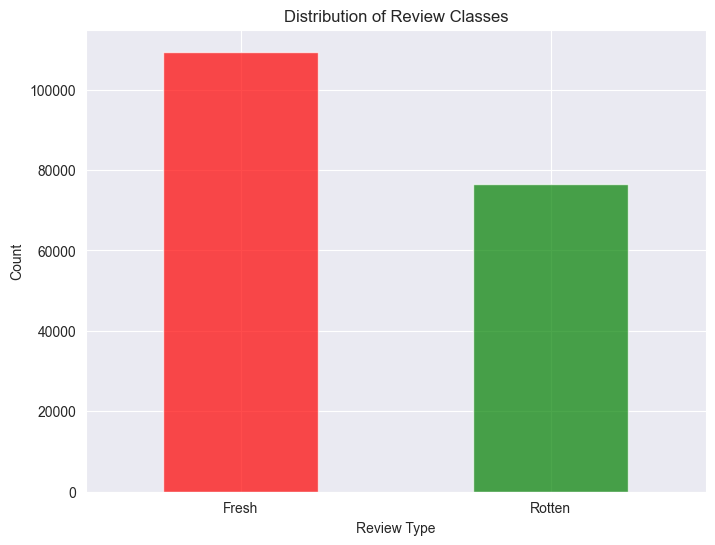

In [18]:
#TODO: inspect classes 'Rotten' and 'Fresh'
# Visualize the distribution of classes ('rotten' and 'fresh')
class_distribution = merged_df['review_type'].value_counts()
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Distribution of Review Classes')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [19]:
#TODO: generate required tf/idf values
# Generate TF-IDF values
# Preprocess text data
from collections import Counter

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

merged_df['processed_content'] = merged_df['review_content'].astype(str).apply(preprocess_text)

# Calculate term frequency (TF)
class_tf = {'rotten': Counter(), 'fresh': Counter()}
for _, row in merged_df.iterrows():
    review_type = row['review_type'].lower()
    words = row['processed_content'].split()
    class_tf[review_type].update(words)

# Calculate document frequency (DF)
word_document_counts = Counter()
for content in merged_df['processed_content']:
    words = set(content.split())
    word_document_counts.update(words)

# Calculate TF-IDF for each class
def calculate_tf_idf(row):
    words = row['processed_content'].split()
    tf_idf_rotten = sum(
        class_tf['rotten'][word] * np.log(len(merged_df) / (1 + word_document_counts[word])) for word in words
    )
    tf_idf_fresh = sum(
        class_tf['fresh'][word] * np.log(len(merged_df) / (1 + word_document_counts[word])) for word in words
    )
    return pd.Series([tf_idf_rotten, tf_idf_fresh])

merged_df[['tf_idf_rotten', 'tf_idf_fresh']] = merged_df.apply(calculate_tf_idf, axis=1)

# Normalize the TF-IDF vectors
def normalize(row):
    vector = np.array([row['tf_idf_rotten'], row['tf_idf_fresh']])
    norm = np.linalg.norm(vector)
    return vector / norm if norm > 0 else vector


In [22]:
#TODO: create embedding vector in which first element represents 'Fresh' class score and second element represents 'Rotten' class score for each word

# Calculate term frequency (TF)
class_tf = {'rotten': Counter(), 'fresh': Counter()}
for _, row in merged_df.iterrows():
    review_type = row['review_type'].lower()
    words = row['processed_content'].split()
    class_tf[review_type].update(words)

# Calculate document frequency (DF)
word_document_counts = Counter()
for content in merged_df['processed_content']:
    words = set(content.split())
    word_document_counts.update(words)

# Create embedding vectors
def create_embedding_vectors():
    embedding_vectors = {}
    all_words = set(class_tf['rotten'].keys()).union(set(class_tf['fresh'].keys()))
    for word in all_words:
        fresh_score = class_tf['fresh'][word] * np.log(len(merged_df) / (1 + word_document_counts[word]))
        rotten_score = class_tf['rotten'][word] * np.log(len(merged_df) / (1 + word_document_counts[word]))
        embedding_vectors[word] = [fresh_score, rotten_score]
    return embedding_vectors

embedding_vectors = create_embedding_vectors()

# Prepare data for training
def embed_review(content):
    words = content.split()
    vector = np.mean([embedding_vectors.get(word, [0, 0]) for word in words], axis=0)
    return vector

embedded_reviews = np.array(merged_df['processed_content'].apply(embed_review).tolist())
labels = (merged_df['review_type'] == 'Fresh').astype(int).values  # 1 for 'Fresh', 0 for 'Rotten'



# Display sample embedding vectors
sample_words = list(embedding_vectors.keys())[:5]
for word in sample_words:
    print(f"Word: {word}, Embedding: {embedding_vectors[word]}")


Word: leonis, Embedding: [10.74717533299063, 21.49435066598126]
Word: milan, Embedding: [51.708551124412324, 0.0]
Word: claiming, Embedding: [69.5537158174201, 9.9362451167743]
Word: sybil, Embedding: [0.0, 32.24152599897189]
Word: jaipur, Embedding: [11.03485740544241, 11.03485740544241]


Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [23]:
#TODO: split dataset and train you model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(embedded_reviews, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

model.fit(X_train_poly, y_train, X_val_poly, y_val)


X_train_oversampled, y_train_oversampled = resample(
    X_train[y_train == 1], y_train[y_train == 1],
    replace=True, n_samples=len(y_train[y_train == 0]),
    random_state=42
)
X_train_balanced = np.vstack([X_train, X_train_oversampled])
y_train_balanced = np.hstack([y_train, y_train_oversampled])

# Train logistic regression model
model = LogisticRegressionGD(learning_rate=0.01, n_steps=3000, tolerance=1e-8)
model.fit(X_train, y_train, X_val, y_val)

scaler = StandardScaler()
embedded_reviews = scaler.fit_transform(embedded_reviews) 
print("Embedding Statistics:")
print(f"Min value: {embedded_reviews.min()}")
print(f"Max value: {embedded_reviews.max()}")
print(f"Mean value: {embedded_reviews.mean()}")
print(f"Standard deviation: {embedded_reviews.std()}")


# Evaluate model on test data
test_accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Converged at step 6.
Converged at step 6.
Embedding Statistics:
Min value: -4.253519038894286
Max value: 4.973265827920674
Mean value: -4.7080590552519984e-14
Standard deviation: 1.0000000000000322
Test Accuracy: 58.52%


Step 100: Loss = 0.6917, Validation Accuracy = 0.5438
Step 200: Loss = 0.6905, Validation Accuracy = 0.5496
Step 300: Loss = 0.6896, Validation Accuracy = 0.5552
Step 400: Loss = 0.6887, Validation Accuracy = 0.5620
Step 500: Loss = 0.6878, Validation Accuracy = 0.5681
Step 600: Loss = 0.6871, Validation Accuracy = 0.5745
Step 700: Loss = 0.6863, Validation Accuracy = 0.5795
Step 800: Loss = 0.6856, Validation Accuracy = 0.5849
Step 900: Loss = 0.6849, Validation Accuracy = 0.5910
Step 1000: Loss = 0.6842, Validation Accuracy = 0.5965
Step 1100: Loss = 0.6836, Validation Accuracy = 0.6003
Step 1200: Loss = 0.6829, Validation Accuracy = 0.6046
Step 1300: Loss = 0.6823, Validation Accuracy = 0.6085
Step 1400: Loss = 0.6818, Validation Accuracy = 0.6117
Step 1500: Loss = 0.6812, Validation Accuracy = 0.6152
Step 1600: Loss = 0.6807, Validation Accuracy = 0.6181
Step 1700: Loss = 0.6802, Validation Accuracy = 0.6207
Step 1800: Loss = 0.6797, Validation Accuracy = 0.6230
Step 1900: Loss = 0

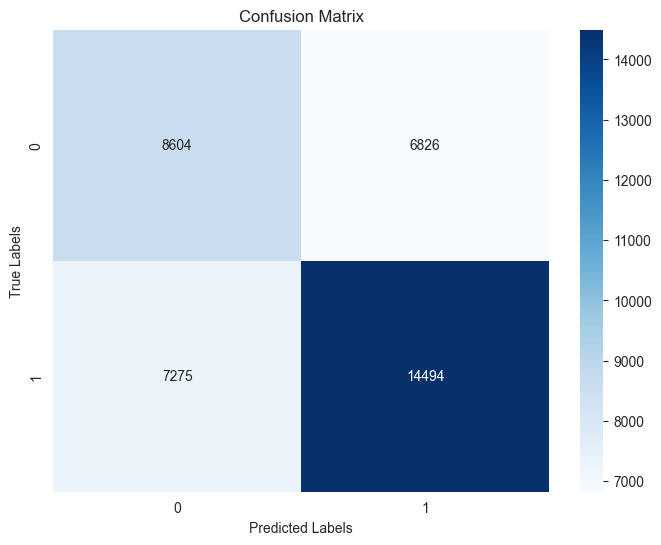

Classification Report:
              precision    recall  f1-score   support

      Rotten       0.54      0.56      0.55     15430
       Fresh       0.68      0.67      0.67     21769

    accuracy                           0.62     37199
   macro avg       0.61      0.61      0.61     37199
weighted avg       0.62      0.62      0.62     37199



In [26]:
#TODO: inspect the performance of model
# Split dataset
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_temp, y_train, y_temp = train_test_split(embedded_reviews, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train logistic regression model
model = LogisticRegressionGD(learning_rate=0.01, n_steps=2000, tolerance=1e-8)
model.fit(X_train, y_train, X_val, y_val)

# Evaluate model on test data
test_accuracy = model.test_accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot confusion matrix
model.plot_confusion_matrix(X_test, y_test, labels=[0, 1])

# Inspect model performance
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Rotten', 'Fresh']))


## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [ ]:
#TODO: import dataset and inspect it


### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [ ]:
class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(y):
        """Calculate the entropy of a dataset."""

    def information_gain(X, y, feature_index):
        """Calculate the information gain for a feature."""

    def best_feature_to_split(self, X, y):
        """
        Find the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        """

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample by traversing the tree.
        Args:
            sample: A 1D numpy array of feature values.
            tree: The decision tree (dictionary).
        Returns:
            int or str: Predicted label for the sample.
        """

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        Args:
            X: 2D numpy array of feature values.
        Returns:
            List[int or str]: Predicted labels for the dataset.
        """


### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [ ]:

#TODO: encode categorical variables

#TODO: split dataset into features (X) and labels (y)

#TODO: split dataset into test and train

#TODO: train your model

#TODO: make predictions on the test set

#TODO: evaluate the predictions


**Could you explain why is the Accuracy Poor?**

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [ ]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree class.
        Args:
            max_depth (int, optional): Maximum depth of the tree. If None, the tree grows fully.
        """

    def entropy(y):
        """Calculate the entropy of a dataset."""

    def information_gain(X, y, feature_index):
        """Calculate the information gain for a categorical feature."""

    def find_best_threshold(self, feature_column, y):
        """
        Find the best threshold to split a numerical feature.
        Returns the thresholds and corresponding information gains.
        """

    def best_feature_to_split(self, X, y):
        """
        Determine the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        Returns:
            A dictionary representing the decision tree.
        """

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        """


### Testing (5 points)

In [ ]:

#TODO: encode categorical variables

#TODO: split dataset into features (X) and labels (y)

#TODO: split dataset into test and train

#TODO: train your model

#TODO: make predictions on the test set

#TODO: evaluate the predictions


**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**